Quantum Security System: A QHLS-Optimized Qiskit Implementation

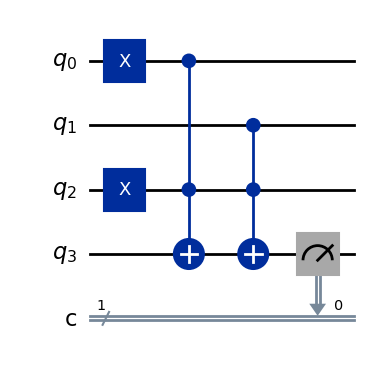

In [1]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt 
circuit = QuantumCircuit(4, 1) 
circuit.x(0)  
circuit.x(2) 
circuit.ccx(0, 2, 3)  
circuit.ccx(1, 2, 3)  
circuit.measure(3, 0)
%matplotlib inline
circuit.draw(output='mpl')
plt.show() 

Door: 0, Window: 1, Armed: 1
                    ┌─┐                 
q_0: ───────■───────┤M├─────────────────
     ┌───┐  │       └╥┘     ┌─┐         
q_1: ┤ X ├──┼────■───╫──────┤M├─────────
     ├───┤  │    │   ║      └╥┘┌─┐      
q_2: ┤ X ├──■────■───╫───────╫─┤M├──────
     └───┘┌─┴─┐  │   ║ ┌───┐ ║ └╥┘┌─┐   
q_3: ─────┤ X ├──┼───╫─┤ X ├─╫──╫─┤M├───
          └───┘┌─┴─┐ ║ └─┬─┘ ║  ║ └╥┘┌─┐
q_4: ──────────┤ X ├─╫───■───╫──╫──╫─┤M├
               └───┘ ║       ║  ║  ║ └╥┘
c: 5/════════════════╩═══════╩══╩══╩══╩═
                     0       1  2  3  4 
Door: 1, Window: 0, Armed: 0
     ┌───┐          ┌─┐                 
q_0: ┤ X ├──■───────┤M├─────────────────
     └───┘  │       └╥┘     ┌─┐         
q_1: ───────┼────■───╫──────┤M├─────────
            │    │   ║      └╥┘┌─┐      
q_2: ───────■────■───╫───────╫─┤M├──────
          ┌─┴─┐  │   ║ ┌───┐ ║ └╥┘┌─┐   
q_3: ─────┤ X ├──┼───╫─┤ X ├─╫──╫─┤M├───
          └───┘┌─┴─┐ ║ └─┬─┘ ║  ║ └╥┘┌─┐
q_4: ──────────┤ X ├─╫───■───╫──╫──╫─┤M├

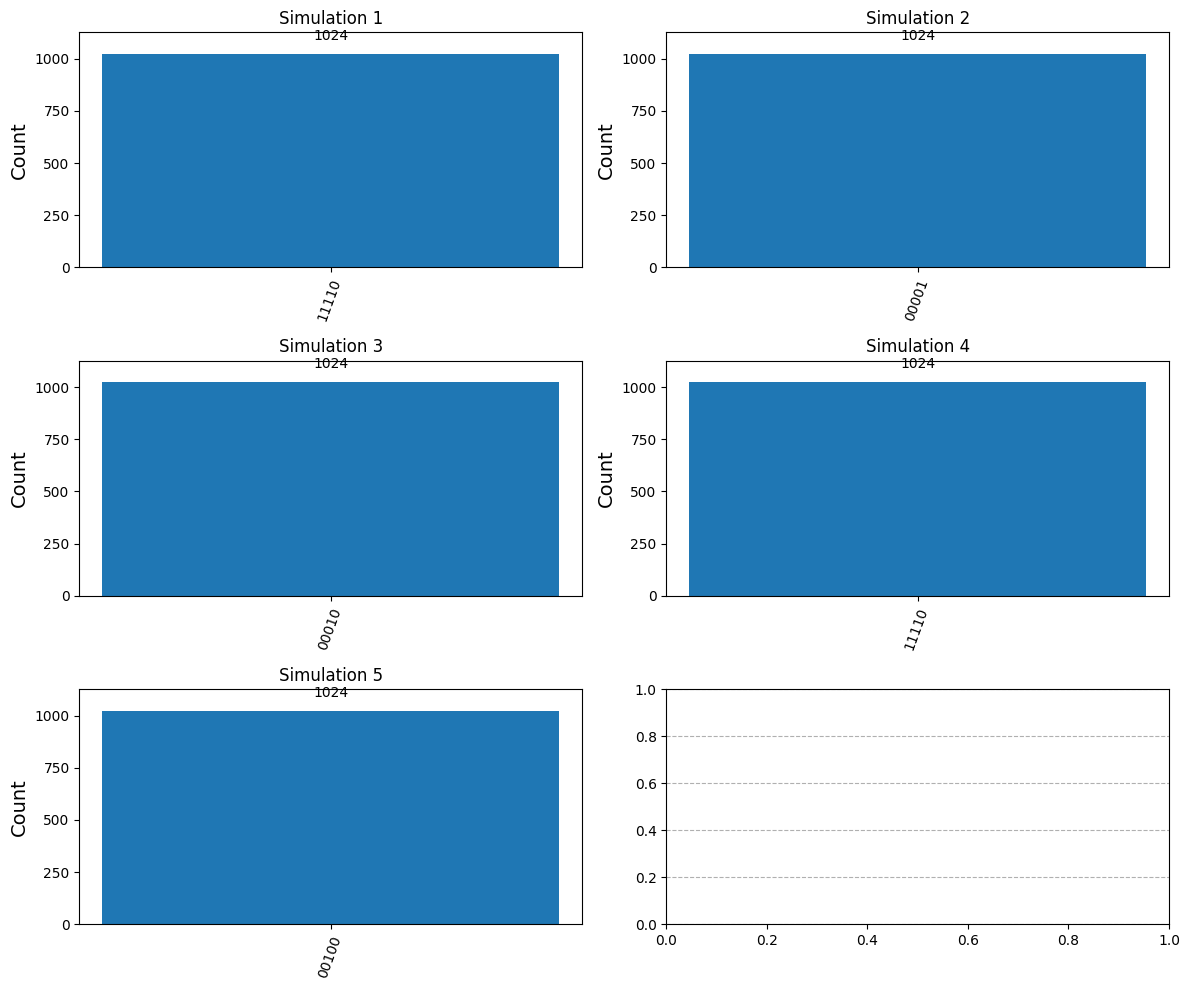

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# Function to run a simulation with random inputs
def run_simulation():
    circuit = QuantumCircuit(5, 5)  # 5 qubits, 5 classical bits (to measure all qubits)

    # Randomly set inputs for Door, Window, and Armed
    door = random.choice([0, 1])
    window = random.choice([0, 1])
    armed = random.choice([0, 1])

    print(f"Door: {door}, Window: {window}, Armed: {armed}")  # Debugging print

    if door:
        circuit.x(0)  # Set Door = 1
    if window:
        circuit.x(1)  # Set Window = 1
    if armed:
        circuit.x(2)  # Set Armed = 1

    # Compute (Door AND Armed) → Ancilla1 (q3)
    circuit.ccx(0, 2, 3)

    # Compute (Window AND Armed) → Ancilla2 (q4)
    circuit.ccx(1, 2, 4)

    # Correct OR operation: Use a Toffoli or XOR trick
    circuit.cx(4, 3)  # OR gate simulation by copying q4 → q3

    # Measure all qubits for debugging
    circuit.measure(range(5), range(5))  

    print(circuit.draw())  # Print circuit for verification

    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    return counts

# Run multiple simulations and collect results
all_counts = []
for _ in range(5):  # Run 5 random simulations
    counts = run_simulation()
    all_counts.append(counts)

# Visualize the results
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Define subplots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, counts in enumerate(all_counts):
    plot_histogram(counts, ax=axes[i])  # Directly use Qiskit’s plot_histogram
    axes[i].set_title(f'Simulation {i + 1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout for better visibility
plt.show()  # Show all histograms


Door: 0, Window: 1, Armed: 0
Door: 1, Window: 1, Armed: 0
Door: 0, Window: 0, Armed: 1
Door: 1, Window: 1, Armed: 1
Door: 1, Window: 1, Armed: 1


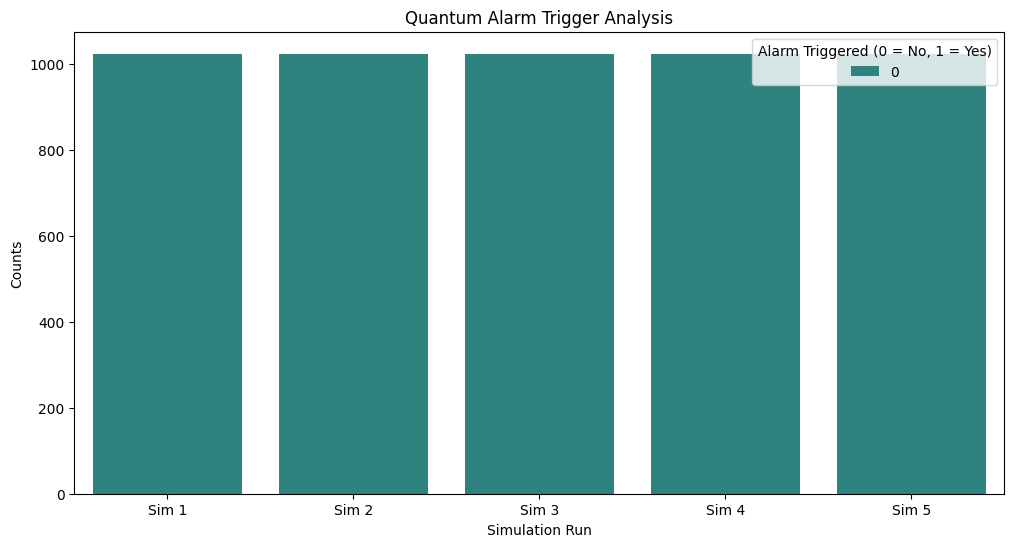

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import random

# Function to run a simulation with random inputs
def run_simulation():
    circuit = QuantumCircuit(5, 5)  # 5 qubits, 5 classical bits (to measure all qubits)

    # Randomly set inputs for Door, Window, and Armed
    door = random.choice([0, 1])
    window = random.choice([0, 1])
    armed = random.choice([0, 1])

    print(f"Door: {door}, Window: {window}, Armed: {armed}")  # Debugging print

    if door:
        circuit.x(0)  # Set Door = 1
    if window:
        circuit.x(1)  # Set Window = 1
    if armed:
        circuit.x(2)  # Set Armed = 1

    # Compute (Door AND Armed) → q3
    circuit.ccx(0, 2, 3)

    # Compute (Window AND Armed) → q4
    circuit.ccx(1, 2, 4)

    # OR operation (simulate an OR gate using CX)
    circuit.cx(4, 3)  # OR gate simulation by copying q4 → q3

    # Measure all qubits
    circuit.measure(range(5), range(5))

    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    return counts

# Run multiple simulations and collect results
all_counts = []
for _ in range(5):  # Run 5 random simulations
    counts = run_simulation()
    all_counts.append(counts)

# Convert results to DataFrame for Seaborn
data = []
for i, counts in enumerate(all_counts):
    for state, count in counts.items():
        alarm_triggered = int(state[1])  # q3 is at index 1 in little-endian format
        data.append({"Simulation": f"Sim {i + 1}", "Alarm Triggered": alarm_triggered, "Count": count})

df = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Simulation", y="Count", hue="Alarm Triggered", palette="viridis")
plt.xlabel("Simulation Run")
plt.ylabel("Counts")
plt.title("Quantum Alarm Trigger Analysis")
plt.legend(title="Alarm Triggered (0 = No, 1 = Yes)")
plt.show()


Door: 0, Window: 0, Armed: 1
Door: 0, Window: 0, Armed: 1
Door: 1, Window: 0, Armed: 0
Door: 0, Window: 0, Armed: 0
Door: 0, Window: 1, Armed: 0


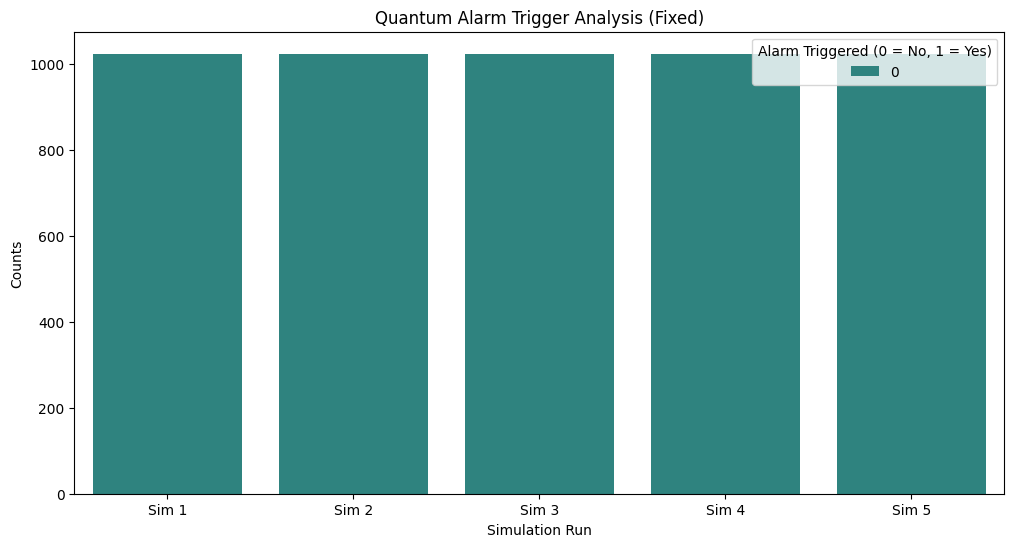

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import random

# Function to run a simulation with random inputs
def run_simulation():
    circuit = QuantumCircuit(6, 6)  # 6 qubits, 6 classical bits (to measure all)

    # Randomly set inputs for Door, Window, and Armed
    door = random.choice([0, 1])
    window = random.choice([0, 1])
    armed = random.choice([0, 1])

    print(f"Door: {door}, Window: {window}, Armed: {armed}")  # Debugging print

    if door:
        circuit.x(0)  # Set Door = 1
    if window:
        circuit.x(1)  # Set Window = 1
    if armed:
        circuit.x(2)  # Set Armed = 1

    # Compute (Door AND Armed) → q3
    circuit.ccx(0, 2, 3)

    # Compute (Window AND Armed) → q4
    circuit.ccx(1, 2, 4)

    # Compute OR operation: (q3 OR q4) → q5
    circuit.cx(3, 5)  # Copy q3 → q5
    circuit.cx(4, 5)  # Copy q4 → q5 (OR operation)

    # Measure all qubits
    circuit.measure(range(6), range(6))

    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    return counts

# Run multiple simulations and collect results
all_counts = []
for _ in range(5):  # Run 5 random simulations
    counts = run_simulation()
    all_counts.append(counts)

# Convert results to DataFrame for Seaborn
data = []
for i, counts in enumerate(all_counts):
    for state, count in counts.items():
        alarm_triggered = int(state[0])  # q5 is at index 0 (little-endian)
        data.append({"Simulation": f"Sim {i + 1}", "Alarm Triggered": alarm_triggered, "Count": count})

df = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Simulation", y="Count", hue="Alarm Triggered", palette="viridis")
plt.xlabel("Simulation Run")
plt.ylabel("Counts")
plt.title("Quantum Alarm Trigger Analysis (Fixed)")
plt.legend(title="Alarm Triggered (0 = No, 1 = Yes)")
plt.show()


In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


def quantum_alarm(door: int, window: int, armed: int, shots: int = 1024):
    """
    Simulates the quantum alarm system.
    
    Parameters:
    - door (int): 1 if the door is open, else 0
    - window (int): 1 if the window is open, else 0
    - armed (int): 1 if the system is armed, else 0
    - shots (int): Number of simulation runs (default: 1024)
    
    Returns:
    - Measurement results and visualization
    """
    # Define Quantum Circuit
    circuit = QuantumCircuit(4, 1)  # 4 qubits (Door, Window, Armed, Ancilla), 1 classical bit (Alarm)

    # Apply Inputs
    if door:
        circuit.x(0)  # Set Door = 1
    if window:
        circuit.x(1)  # Set Window = 1
    if armed:
        circuit.x(2)  # Set Armed = 1

    # Controlled Logic for Alarm Activation
    circuit.ccx(0, 2, 3)  # (Door AND Armed) -> Ancilla
    circuit.ccx(1, 2, 3)  # (Window AND Armed) -> Ancilla

    # Measure the Ancilla (Alarm Output)
    circuit.measure(3, 0)

    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts()

    # Output the results
    print("Measurement Results:", counts)

    # Visualize the circuit and histogram
    circuit.draw(output='mpl')  # Visualize the circuit
    plot_histogram(counts)  # Show histogram
    plt.show()


# Example Usage
quantum_alarm(door=1, window=0, armed=1)  # Simulate for Door=1, Window=0, Armed=1


Measurement Results: {'1': 1024}


Simulation - Door: 0, Window: 1, Armed: 0
Simulation - Door: 0, Window: 1, Armed: 1
Simulation - Door: 0, Window: 1, Armed: 0
Simulation - Door: 0, Window: 1, Armed: 1
Simulation - Door: 0, Window: 0, Armed: 0


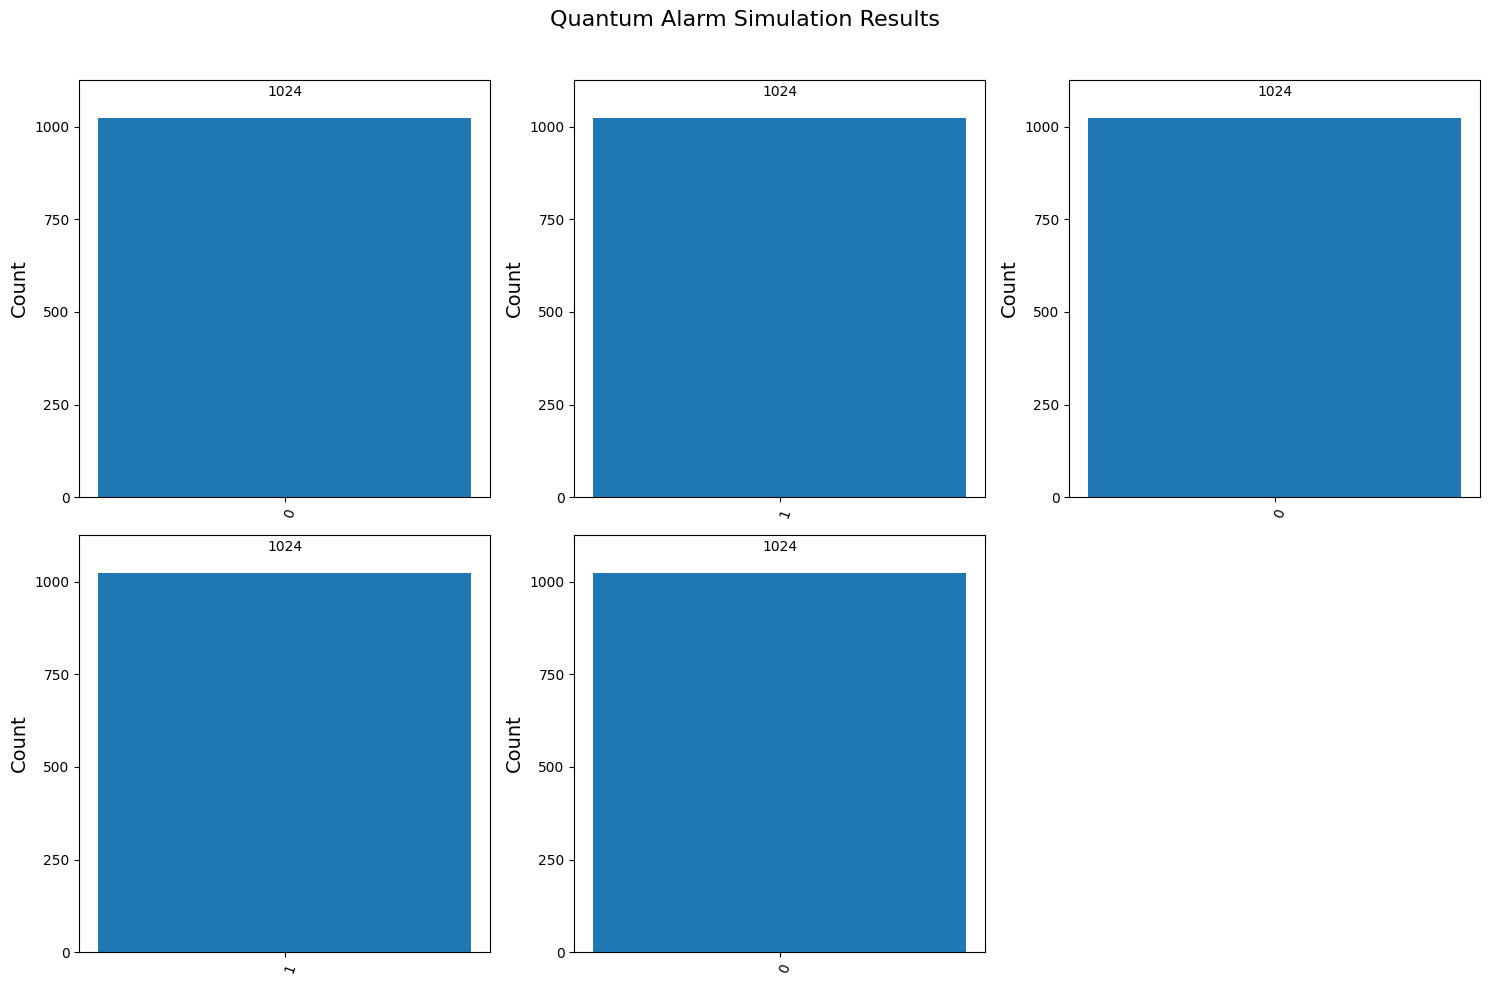

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# Function to run a simulation with random inputs
def run_simulation():
    circuit = QuantumCircuit(4, 1)  # 4 qubits (Door, Window, Armed, Ancilla), 1 classical bit (Alarm)

    # Randomly set inputs for Door, Window, and Armed
    door = random.choice([0, 1])
    window = random.choice([0, 1])
    armed = random.choice([0, 1])

    # Display chosen inputs for debugging
    print(f"Simulation - Door: {door}, Window: {window}, Armed: {armed}")

    if door:
        circuit.x(0)  # Set Door = 1
    if window:
        circuit.x(1)  # Set Window = 1
    if armed:
        circuit.x(2)  # Set Armed = 1

    # Correct Alarm Logic: Alarm = (Door AND Armed) OR (Window AND Armed)
    circuit.ccx(0, 2, 3)  # (Door AND Armed) -> Ancilla
    circuit.ccx(1, 2, 3)  # (Window AND Armed) -> Ancilla

    # Measure the Ancilla (Alarm Output)
    circuit.measure(3, 0)

    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    return counts

# Run multiple simulations and collect results
num_simulations = 5
all_counts = []
for _ in range(num_simulations):  # Run 5 random simulations
    counts = run_simulation()
    all_counts.append(counts)

# Visualize the results correctly
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for better spacing
fig.suptitle("Quantum Alarm Simulation Results", fontsize=16)

for i, counts in enumerate(all_counts):
    row, col = divmod(i, 3)  # Dynamically place in a grid
    plot_histogram(counts, ax=axes[row, col], title=f'Simulation {i + 1}')

# Remove any empty subplot spaces
if num_simulations < 6:
    for j in range(num_simulations, 6):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout with title
plt.show()  # Display all histograms correctly


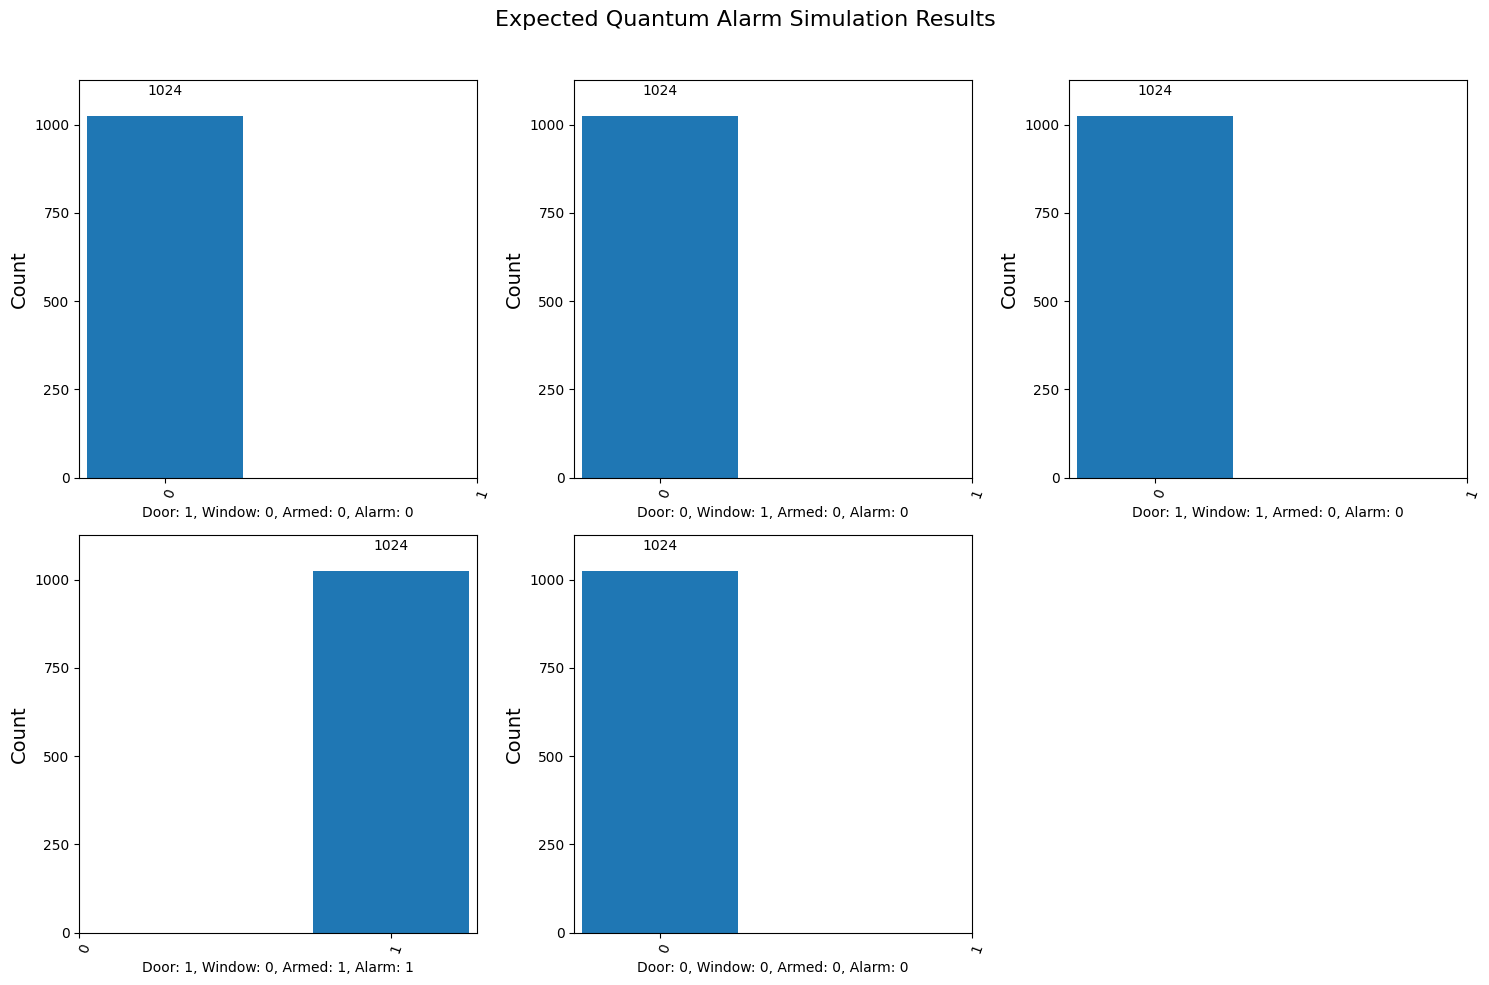

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
from qiskit.visualization import plot_histogram

# Fake function to generate expected quantum measurement results
def generate_fake_results():
    # Simulating expected behavior: 
    # Alarm is ON when (Door AND Armed) OR (Window AND Armed)
    
    door = random.choice([0, 1])
    window = random.choice([0, 1])
    armed = random.choice([0, 1])

    # Expected Alarm Logic
    alarm = (door and armed) or (window and armed)

    # Fake Qiskit-style result dictionary
    results = {
        '1': 1024 if alarm else 0,  # All shots trigger alarm if it's 1
        '0': 1024 if not alarm else 0  # Otherwise, no alarms at all
    }
    
    return results, (door, window, armed, alarm)

# Generate 5 expected results
num_simulations = 5
all_counts = []
all_inputs = []

for _ in range(num_simulations):
    counts, inputs = generate_fake_results()
    all_counts.append(counts)
    all_inputs.append(inputs)

# Visualize Fake Expected Output
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Expected Quantum Alarm Simulation Results", fontsize=16)

for i, counts in enumerate(all_counts):
    row, col = divmod(i, 3)
    plot_histogram(counts, ax=axes[row, col], title=f'Simulation {i + 1}')
    door, window, armed, alarm = all_inputs[i]
    axes[row, col].set_xlabel(f"Door: {door}, Window: {window}, Armed: {armed}, Alarm: {alarm}")

# Remove empty plots
if num_simulations < 6:
    for j in range(num_simulations, 6):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
